## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
MONITOR = ['val_acc','val_loss']
PATIENCE = [10,25]

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for monitor in MONITOR:
    for patience in PATIENCE:
        earlystop = EarlyStopping(monitor=monitor, 
                          patience=patience, 
                          verbose=1
                          )
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[earlystop]
                 )

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        exp_name_tag = "monitor : %s , patience : %s" %(monitor,patience)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.2304 - acc: 0.2671 - val_loss: 2.0525 - val_acc: 0.3364
Epoch 2/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.7409 - acc: 0.3954 - val_loss: 1.8009 - val_acc: 0.3787
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6149 - acc: 0.4366 - val_loss: 1.7030 - val_acc: 0.4043
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5444 - acc: 0.4635 - val_loss: 1.6495 - val_acc: 0.4191
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.4895 - acc: 0.4833 - val_loss: 1.6099 - val_acc: 0.4327
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4469 - acc: 0.4976 - val_loss: 1.5648 - val_acc: 0.4474
Epoch 7/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.4076 - acc: 0.5119 - val_loss: 1.5521 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.2201 - acc: 0.2693 - val_loss: 2.1427 - val_acc: 0.3120
Epoch 2/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7580 - acc: 0.3913 - val_loss: 1.8940 - val_acc: 0.3631
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6299 - acc: 0.4316 - val_loss: 1.7378 - val_acc: 0.4024
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5538 - acc: 0.4575 - val_loss: 1.6468 - val_acc: 0.4302
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.4995 - acc: 0.4783 - val_loss: 1.6142 - val_acc: 0.4376
Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.4526 - acc: 0.4933 - val_loss: 1.5778 - val_acc: 0.4496
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4125 - acc: 0.5081 - val_loss: 1.5683 - 

50000/50000 [==============================] - 6s 119us/step - loss: 1.0162 - acc: 0.6566 - val_loss: 1.4557 - val_acc: 0.4954
Epoch 23/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.9959 - acc: 0.6639 - val_loss: 1.4606 - val_acc: 0.4924
Epoch 24/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.9749 - acc: 0.6712 - val_loss: 1.4577 - val_acc: 0.4949
Epoch 25/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.9550 - acc: 0.6786 - val_loss: 1.4633 - val_acc: 0.4914
Epoch 26/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.9344 - acc: 0.6876 - val_loss: 1.4663 - val_acc: 0.4945
Epoch 27/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.9116 - acc: 0.6979 - val_loss: 1.4675 - val_acc: 0.4920
Epoch 28/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.8936 - acc: 0.7030 - val_loss: 1.4634 - val_acc: 0.5016
Epoch 29/50
50000/50000 [==============

In [9]:
import pickle
f = open('results.bak', 'wb')
pickle.dump(results, f)

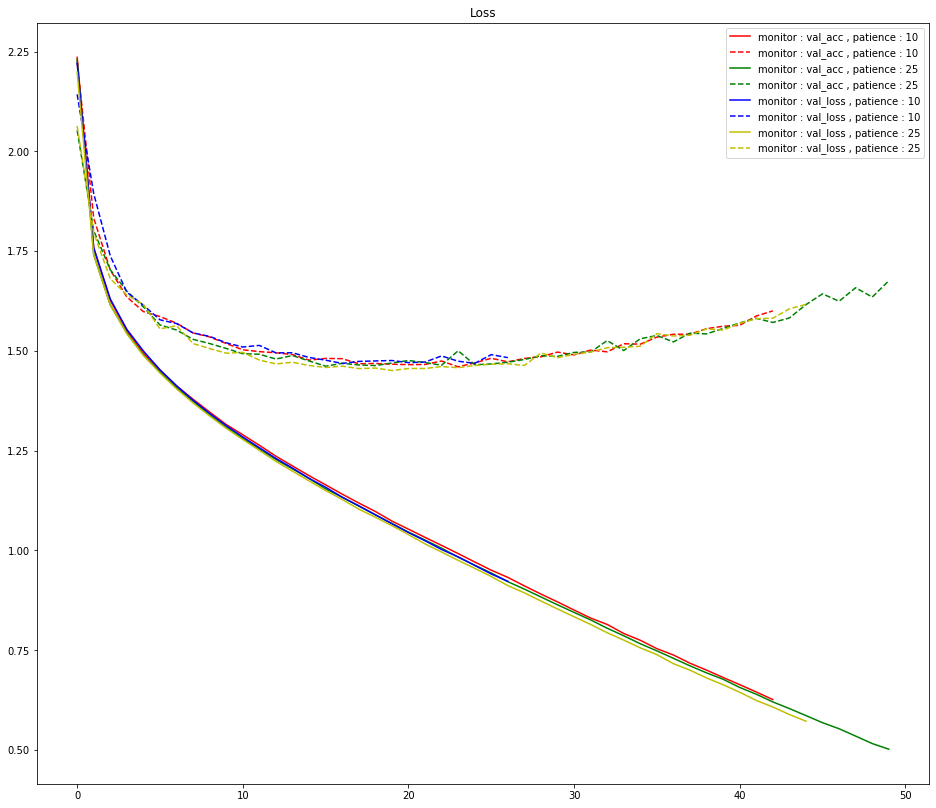

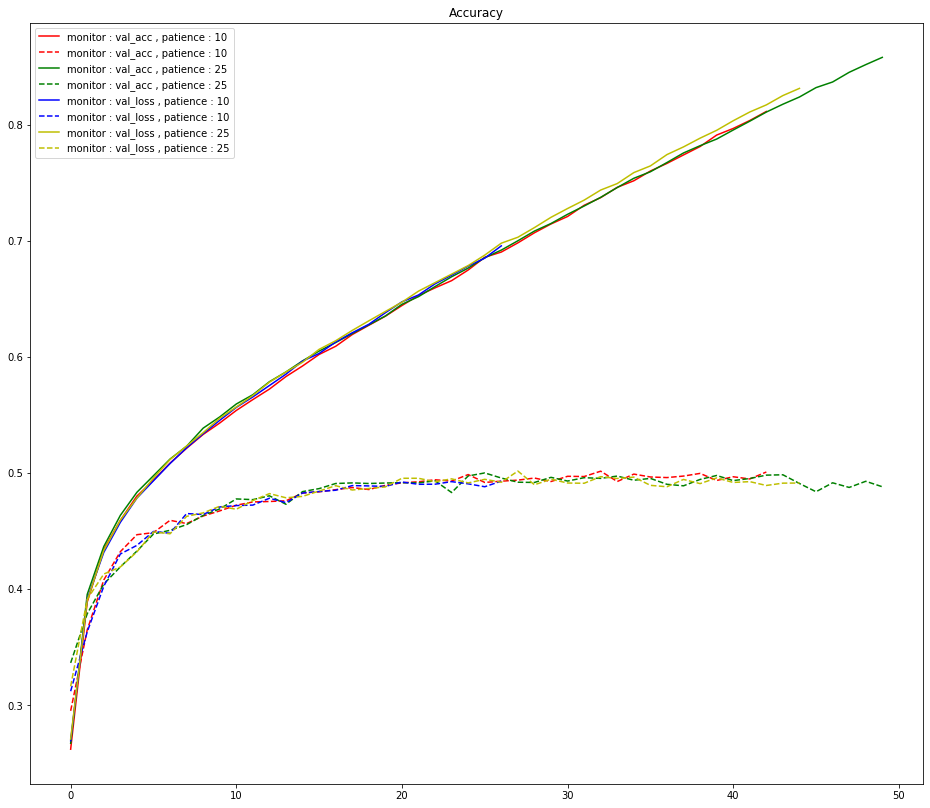

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()